In [4]:
import pickle
import os
import textwrap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dltools.cov.markup import compute

In [5]:
info = pd.read_excel("Data/Data list.xlsx", sheet_name="Cov")
info.head()

,version,target,flag,p,h0pz,h1phiy,scale,script,data
0,v20190511,"C1p,I1p,I1p",<=14,-200--200,any,135--225,4,"aq028, 029, 035, 036; Int-dependent cov KER; t...",Cov KER; target={target} & p={p} & phi={h1phiy...
1,v20190510,"C1p,I1p,I1p",<=14,-200--200,any,any,1,"aq028, 029, 035, 036; Int-dependent cov KER; t...",Cov KER; target={target} & p={p} & phi={h1phiy...
2,v20190510,"C1p,I1p,I1p",<=14,-300--300,any,any,1,"aq028, 029, 035, 036; Int-dependent cov KER; t...",Cov KER; target={target} & p={p} & phi={h1phiy...
3,v20190510,"C1p,I2p,I1p",<=6,-200--200,any,any,1,"aq028, 029, 035, 036; Int-dependent cov KER; t...",Cov KER; target={target} & flag{flag} & p={p} ...
4,v20190510,"C1p,I2p,I1p",<=14,-200--200,any,any,1,"aq028, 029, 035, 036; Int-dependent cov KER; t...",Cov KER; target={target} & flag{flag} & p={p} ...


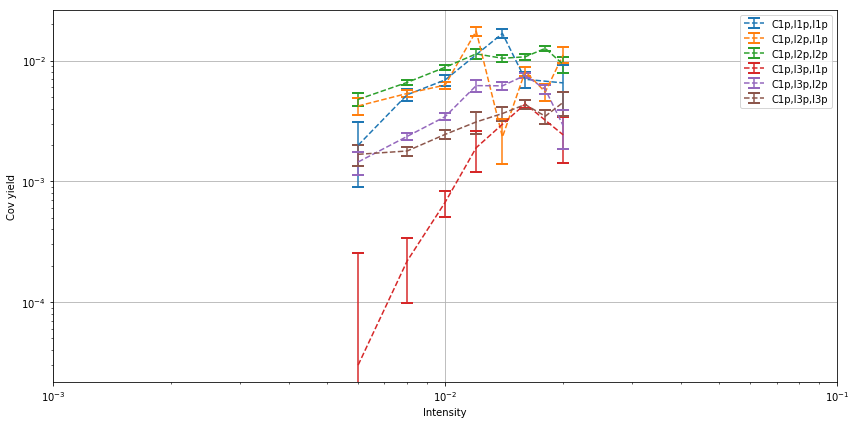

In [6]:
where = (info["target"].str.startswith("C1p")
         & (info["flag"] == "<=14")
         & (info["p"] == "-300--300")
         & (info["h1phiy"] == "any"))
step = 0.002
edges = np.arange(0.005, 0.021, step)


def count(filename, key="ker", attr=None):
    if attr is None:
        attr = {}

    for i, fr in enumerate(edges):
        to = fr + step
        fn = "Data/{}".format(filename.format(fr=fr, to=to, **attr))
        if not os.path.exists(fn):
            continue

        with open(fn, "rb") as fp:
            d = pickle.load(fp)

        yield {"fr": fr,
               "to": to,
               "n": d["N"],
               "cov": d["Cov[X,Y,Z]"][key].sum().values,
               "err": d["Sum[XYZ]"][key].sum().values ** 0.5 / d["N"]}


plt.figure(figsize=(12, 6))
plt.xlabel("Intensity")
plt.ylabel("Cov yield")

for i, (_, r) in enumerate(info[where].iterrows()):
    df = pd.DataFrame(list(count(r["data"], attr=r)))
    where = slice(None)
    where = 0 < df["cov"]
    plt.errorbar(
        df["fr"][where] + step / 2,
        df["cov"][where],
        df["err"][where],
        fmt="--",
        capsize=6,
        capthick=2,
        label=r["target"]
    )
    plt.grid(True)
plt.xlim(0.001, 0.1)
plt.xscale("log")
plt.yscale("log")
plt.legend()
    
# plt.twinx()
# plt.ylabel("Count")
# plt.step(df["fr"], df["n"], where="post")
# plt.ylim(0, None)

plt.tight_layout()
plt.show()

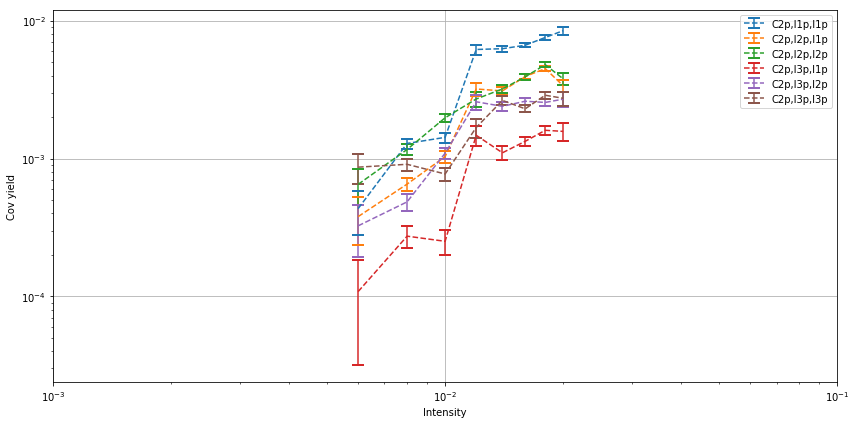

In [6]:
where = (info["target"].str.startswith("C2p")
         & (info["flag"] == "<=14")
         & (info["p"] == "-300--300")
         & (info["h1phiy"] == "any"))
step = 0.002
edges = np.arange(0.005, 0.021, step)


def count(filename, key="ker", attr=None):
    if attr is None:
        attr = {}

    for i, fr in enumerate(edges):
        to = fr + step
        fn = "Data/{}".format(filename.format(fr=fr, to=to, **attr))
        if not os.path.exists(fn):
            continue

        with open(fn, "rb") as fp:
            d = pickle.load(fp)

        yield {"fr": fr,
               "to": to,
               "n": d["N"],
               "cov": d["Sum[XYZ]"][key].sum().values / d["N"],
               "err": d["Sum[XYZ]"][key].sum().values ** 0.5 / d["N"]}


plt.figure(figsize=(12, 6))
plt.xlabel("Intensity")
plt.ylabel("Cov yield")

for i, (_, r) in enumerate(info[where].iterrows()):
    df = pd.DataFrame(list(count(r["data"], attr=r)))
#     where = slice(None)
    where = 0 < df["cov"]
    plt.errorbar(
        df["fr"][where] + step / 2,
        df["cov"][where],
        df["err"][where],
        fmt="--",
        capsize=6,
        capthick=2,
        label=r["target"]
    )
    plt.grid(True)
plt.xlim(0.001, 0.1)
plt.xscale("log")
plt.yscale("log")
plt.legend()
    
# plt.twinx()
# plt.ylabel("Count")
# plt.step(df["fr"], df["n"], where="post")
# plt.ylim(0, None)

plt.tight_layout()
plt.show()

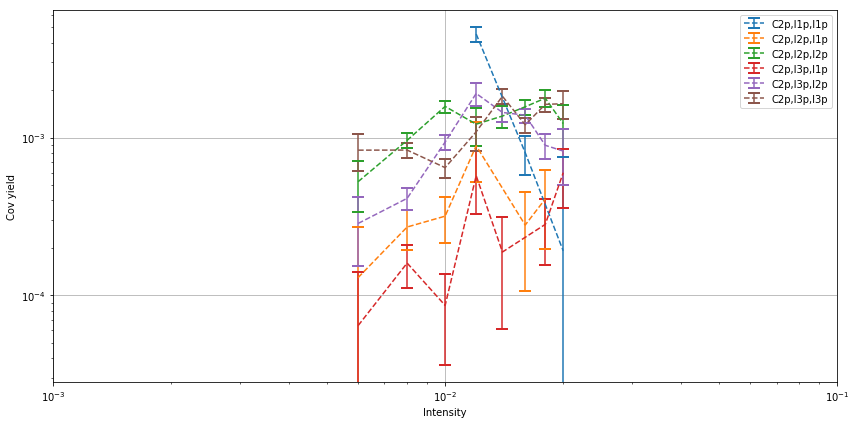

In [7]:
where = (info["target"].str.startswith("C2p")
         & (info["flag"] == "<=14")
         & (info["p"] == "-300--300")
         & (info["h1phiy"] == "any"))
step = 0.002
edges = np.arange(0.005, 0.021, step)


def count(filename, key="ker", attr=None):
    if attr is None:
        attr = {}

    for i, fr in enumerate(edges):
        to = fr + step
        fn = "Data/{}".format(filename.format(fr=fr, to=to, **attr))
        if not os.path.exists(fn):
            continue

        with open(fn, "rb") as fp:
            d = pickle.load(fp)

        yield {"fr": fr,
               "to": to,
               "n": d["N"],
               "cov": d["Cov[X,Y,Z]"][key].sum().values,
               "err": d["Sum[XYZ]"][key].sum().values ** 0.5 / d["N"]}


plt.figure(figsize=(12, 6))
plt.xlabel("Intensity")
plt.ylabel("Cov yield")

for i, (_, r) in enumerate(info[where].iterrows()):
    df = pd.DataFrame(list(count(r["data"], attr=r)))
#     where = slice(None)
    where = 0 < df["cov"]
    plt.errorbar(
        df["fr"][where] + step / 2,
        df["cov"][where],
        df["err"][where],
        fmt="--",
        capsize=6,
        capthick=2,
        label=r["target"]
    )
    plt.grid(True)
plt.xlim(0.001, 0.1)
plt.xscale("log")
plt.yscale("log")
plt.legend()
    
# plt.twinx()
# plt.ylabel("Count")
# plt.step(df["fr"], df["n"], where="post")
# plt.ylim(0, None)

plt.tight_layout()
plt.show()

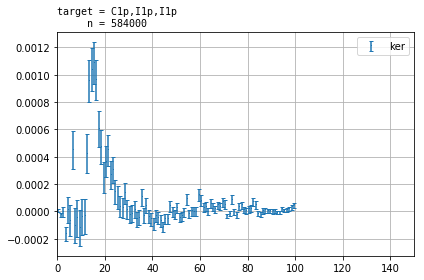

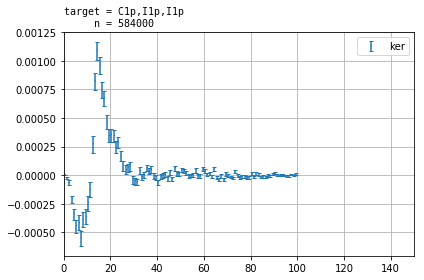

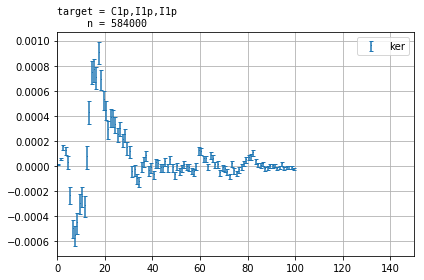

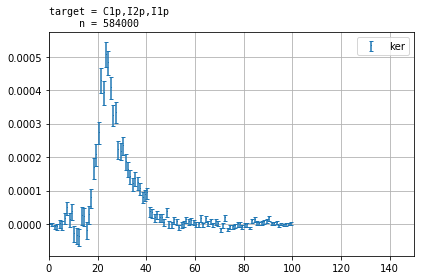

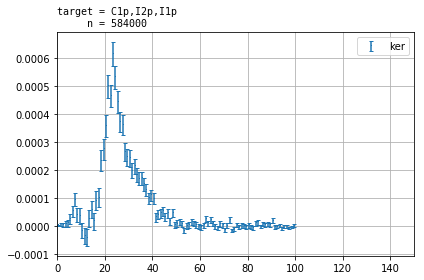

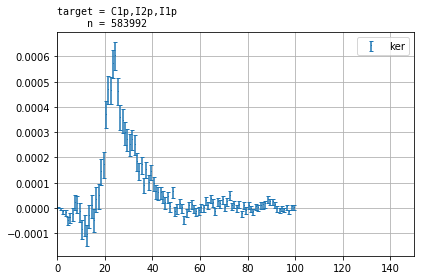

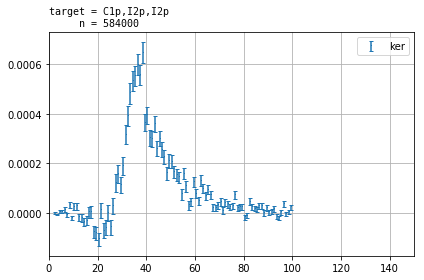

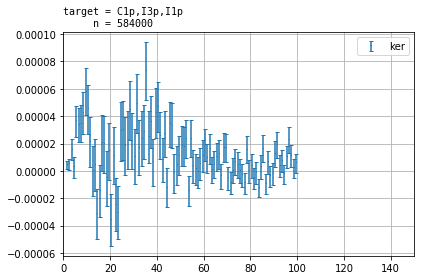

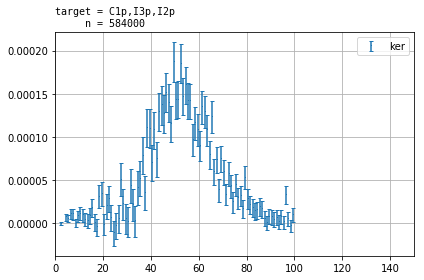

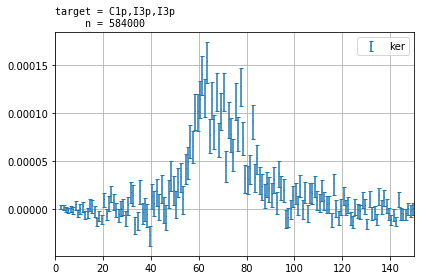

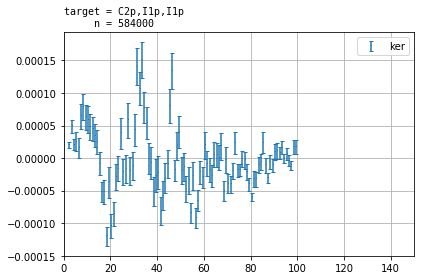

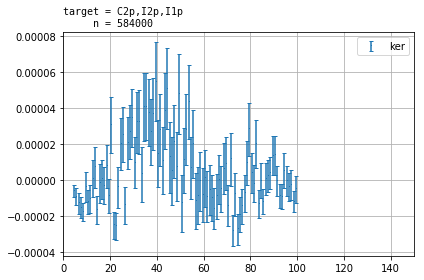

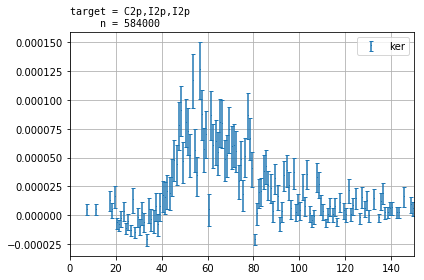

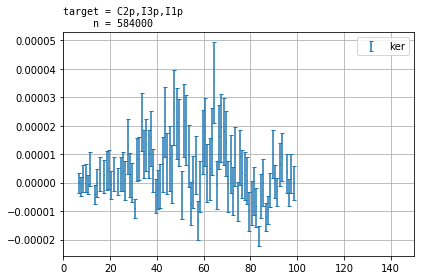

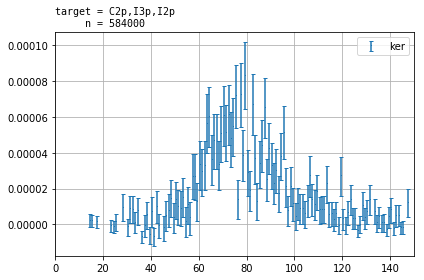

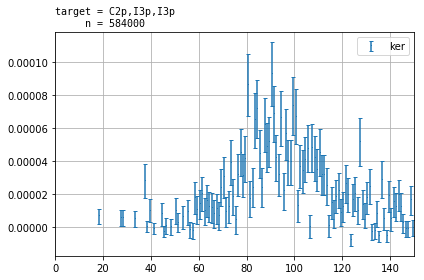

KeyError: 'edge_ker'

In [14]:
step = 0.002
edges = np.arange(0.005, 0.021, step)
x, y = "edge_ker", "ker"

for _, r in info.iterrows():
    def load():
        for i, fr in enumerate(edges):
            to = fr + step
            fn = "Data/{}".format(r["data"].format(fr=fr, to=to, **r))
            if not os.path.exists(fn):
                continue

            with open(fn, "rb") as fp:
                yield pickle.load(fp)
    li = list(load())
    n = sum(d["N"] for d in li)
    if n == 0:
        continue
    d = {
        "Cov[X,Y,Z]": sum(d["N"] * d["Cov[X,Y,Z]"] for d in li) / n,
        "Err[Cov[X,Y,Z]]": (sum((d["N"] * d["Err[Cov[X,Y,Z]]"]) ** 2 for d in li) ** 0.5 / n
                            if all("Err[Cov[X,Y,Z]]" in d for d in li)
                            else sum(d["Sum[XYZ]"] for d in li) ** 0.5 / n),
        "Sum[XYZ]": sum(d["Sum[XYZ]"] for d in li),
    }
    dx = d["Cov[X,Y,Z]"][x][1] - d["Cov[X,Y,Z]"][x][0]
    where = 0 < d["Sum[XYZ]"][y]

    plt.figure()
    plt.title(f"target = {r['target']}\n     n = {n}",
              fontdict={"family": "monospace", "size": "medium"},
              loc="left")
    plt.errorbar(
        d["Cov[X,Y,Z]"][x][where] + dx / 2,
        r["scale"] * d["Cov[X,Y,Z]"][y][where],
        r["scale"] * d["Err[Cov[X,Y,Z]]"][y][where],
        fmt=",",
        capsize=2,
    )
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 150)
    #plt.ylim(-0.0004, 0.0012)
    plt.gca().label_outer()
    plt.tight_layout()
    plt.show()

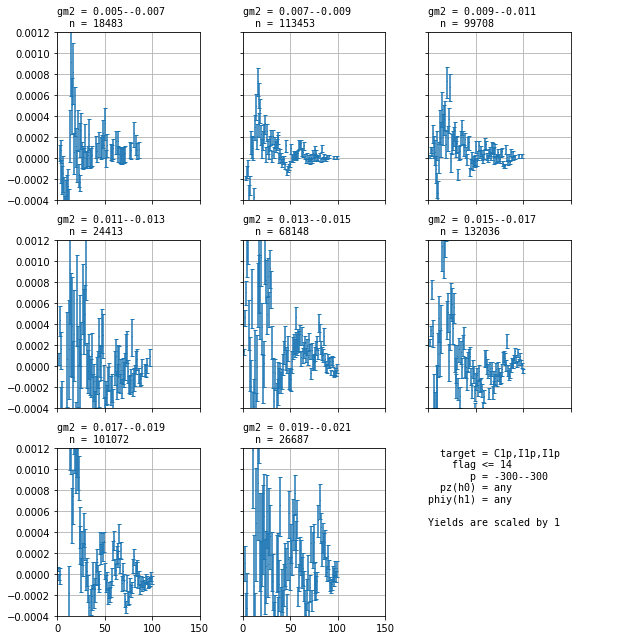

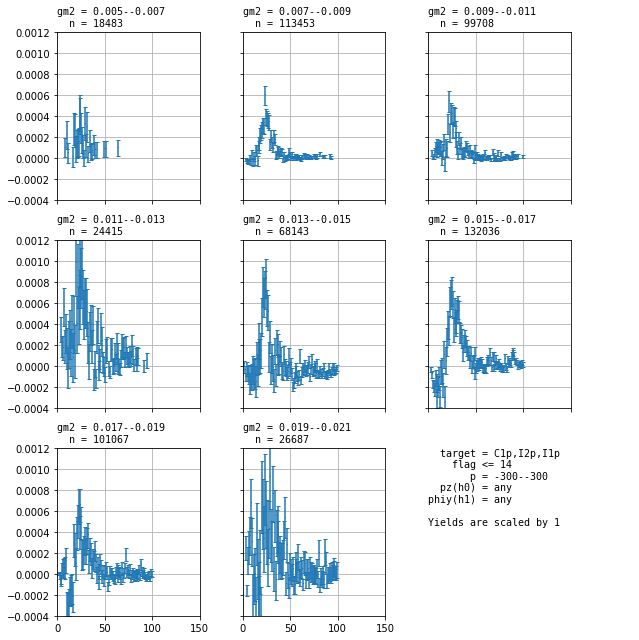

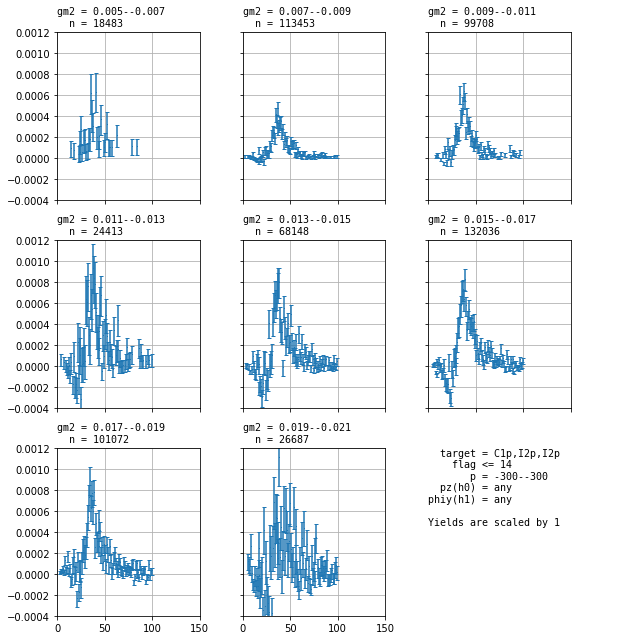

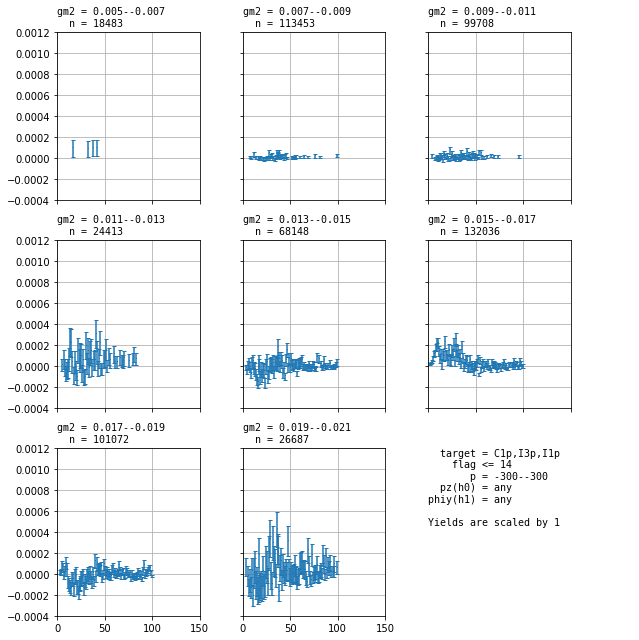

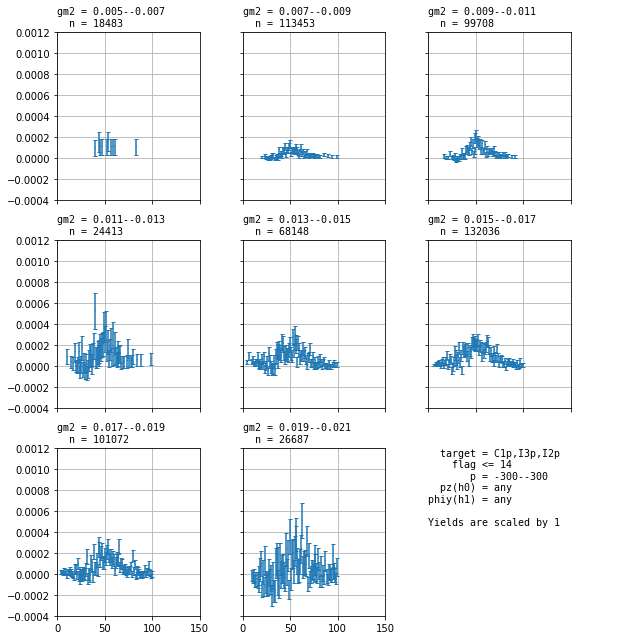

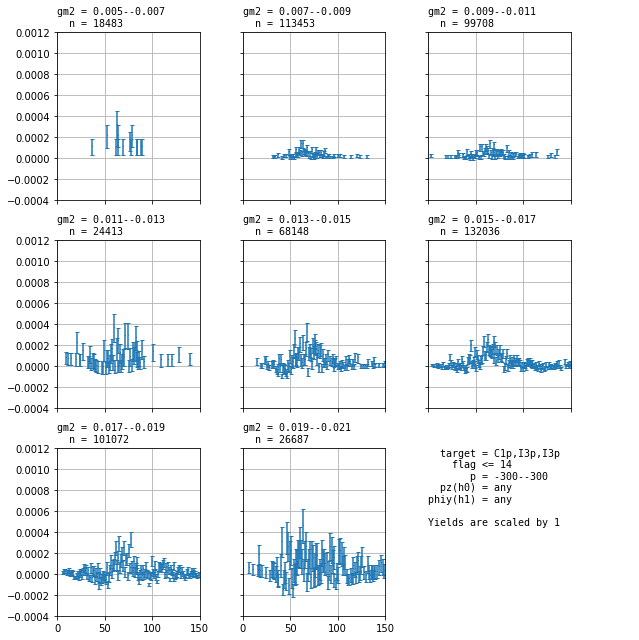

In [8]:
where = (info["target"].str.startswith("C1p")
         & (info["flag"] == "<=14")
         & (info["p"] == "-300--300")
         & (info["h1phiy"] == "any"))
step = 0.002
edges = np.arange(0.005, 0.021, step)
x, y = "edge_ker", "ker"

for _, r in info[where].iterrows():
    plt.figure(figsize=(9, 9))
    for i, fr in enumerate(edges):
        to = fr + step
        fn = "Data/{}".format(r["data"].format(fr=fr, to=to, **r))
        if not os.path.exists(fn):
            continue

        with open(fn, "rb") as fp:
            d = pickle.load(fp)
        n = d["N"]
        dx = d["Cov[X,Y,Z]"][x][1] - d["Cov[X,Y,Z]"][x][0]
        where = 1 < d["Sum[XYZ]"][y]

        plt.subplot(3, 3, i + 1)
        plt.title(f"gm2 = {fr:.3f}--{to:.3f}\n"
                  f"  n = {n}",
                  fontdict={"family": "monospace", "size": "medium"},
                  loc="left")
        plt.errorbar(
            d["Cov[X,Y,Z]"][x][where] + dx / 2,
            r["scale"] * d["Cov[X,Y,Z]"][y][where],
            r["scale"] * d["Err[Cov[X,Y,Z]]"][y][where]
            if "Err[Cov[X,Y,Z]]" in d
            else r["scale"] * d["Sum[XYZ]"][y][where] ** 0.5 / n,
            fmt=",",
            capsize=2,
        )
        plt.grid(True)
        plt.xlim(0, 150)
        plt.ylim(-0.0004, 0.0012)
        plt.gca().label_outer()
    plt.subplot(339)
    plt.text(
        0, 1,
        textwrap.dedent("""\
              target = {target}
                flag {flag}
                   p = {p}
              pz(h0) = {h0pz}
            phiy(h1) = {h1phiy}
            
            Yields are scaled by {scale}\
            """.format_map(r.replace("=", "= ", regex=True))),
        fontdict={"family": "monospace"},
        verticalalignment="top",
    )
    plt.axis("off")
    plt.tight_layout()
    plt.show()

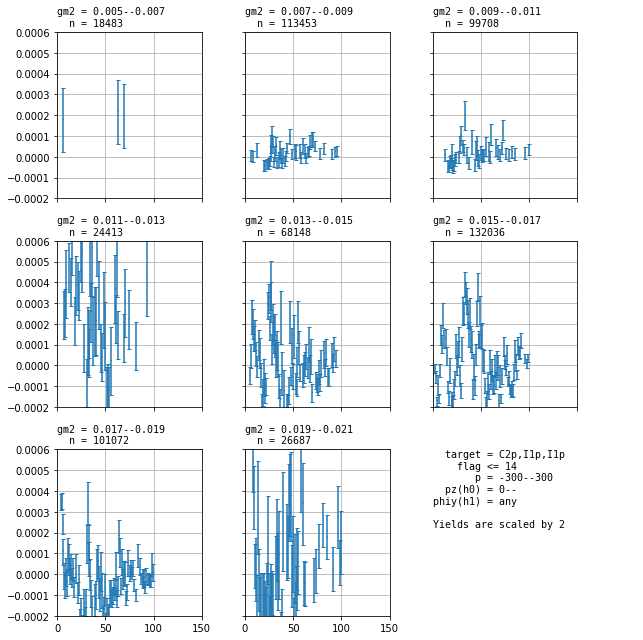

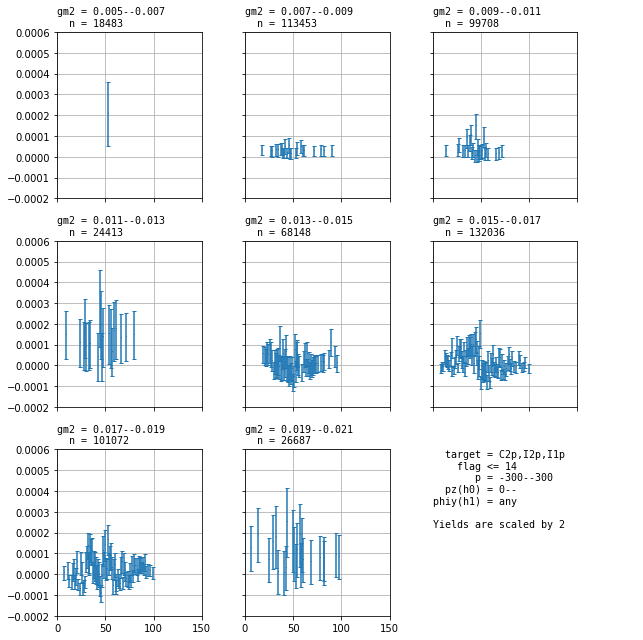

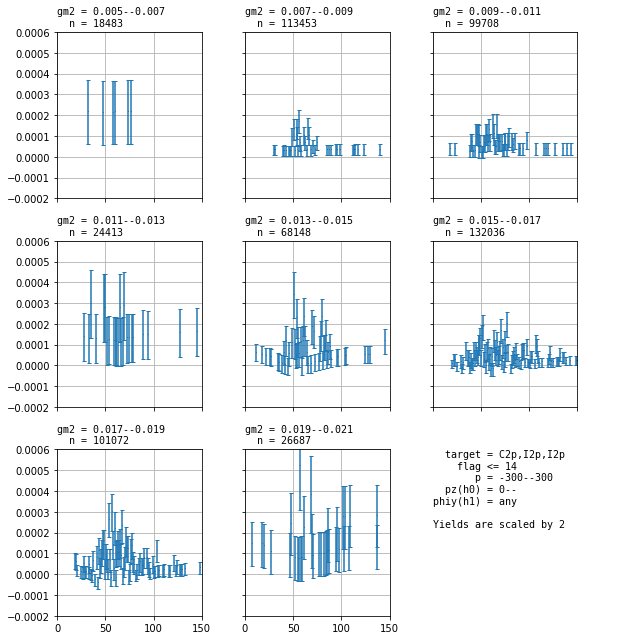

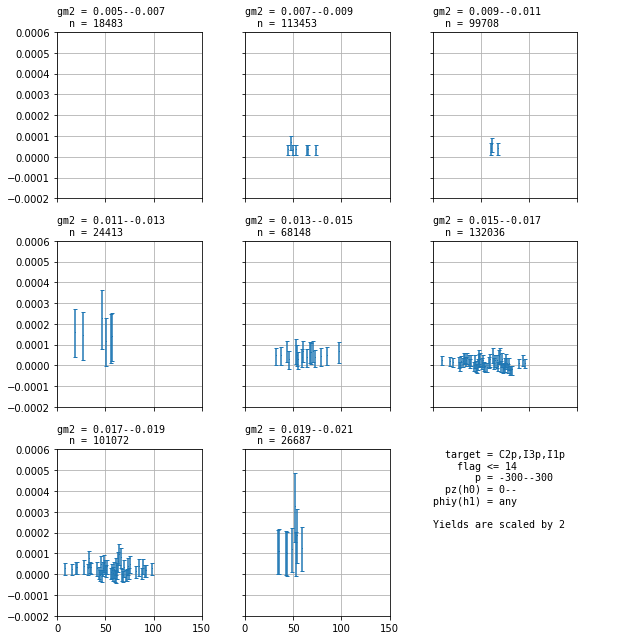

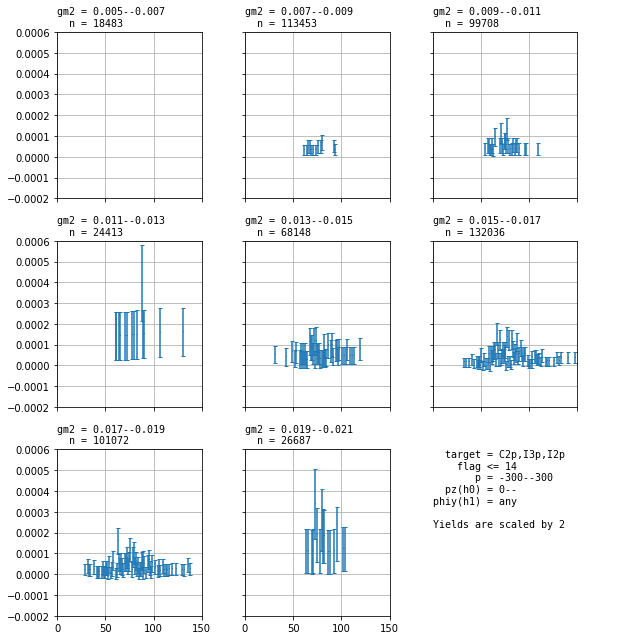

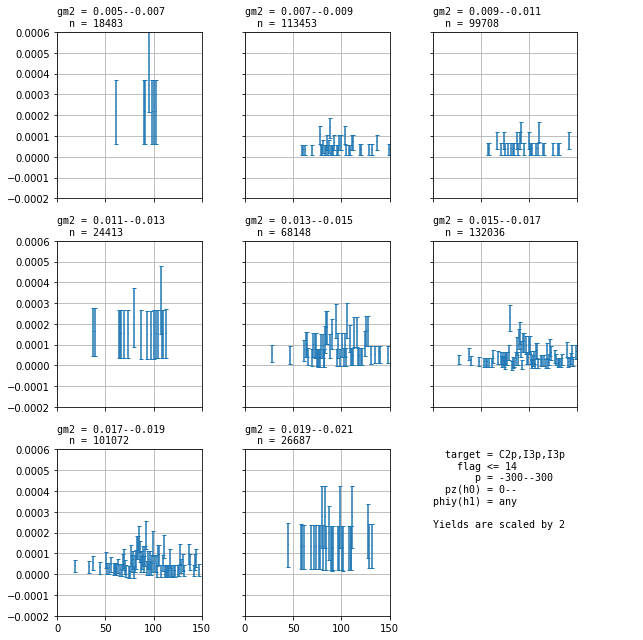

In [9]:
where = (info["target"].str.startswith("C2p")
         & (info["flag"] == "<=14")
         & (info["p"] == "-300--300")
         & (info["h1phiy"] == "any"))
step = 0.002
edges = np.arange(0.005, 0.021, step)
x, y = "edge_ker", "ker"

for _, r in info[where].iterrows():
    plt.figure(figsize=(9, 9))
    for i, fr in enumerate(edges):
        to = fr + step
        fn = "Data/{}".format(r["data"].format(fr=fr, to=to, **r))
        if not os.path.exists(fn):
            continue

        with open(fn, "rb") as fp:
            d = pickle.load(fp)
        n = d["N"]
        dx = d["Cov[X,Y,Z]"][x][1] - d["Cov[X,Y,Z]"][x][0]
        where = 1 < d["Sum[XYZ]"][y]

        plt.subplot(3, 3, i + 1)
        plt.title(f"gm2 = {fr:.3f}--{to:.3f}\n"
                  f"  n = {n}",
                  fontdict={"family": "monospace", "size": "medium"},
                  loc="left")
        plt.errorbar(
            d["Cov[X,Y,Z]"][x][where] + dx / 2,
            r["scale"] * d["Cov[X,Y,Z]"][y][where],
            r["scale"] * d["Err[Cov[X,Y,Z]]"][y][where]
            if "Err[Cov[X,Y,Z]]" in d
            else r["scale"] * d["Sum[XYZ]"][y][where] ** 0.5 / n,
            fmt=",",
            capsize=2,
        )
        plt.grid(True)
        plt.xlim(0, 150)
        plt.ylim(-0.0002, 0.0006)
        plt.gca().label_outer()
    plt.subplot(339)
    plt.text(
        0, 1,
        textwrap.dedent("""\
              target = {target}
                flag {flag}
                   p = {p}
              pz(h0) = {h0pz}
            phiy(h1) = {h1phiy}
            
            Yields are scaled by {scale}\
            """.format_map(r.replace("=", "= ", regex=True))),
        fontdict={"family": "monospace"},
        verticalalignment="top",
    )
    plt.axis("off")
    plt.tight_layout()
    plt.show()